# 1. 資料分析

- 整理數據形成 Dataframe

## u.data

In [1]:
import numpy as np
import pandas as pd
#data = open('C:/Users/User/NDHU/Recommend/ml-100k/u.data',encoding="UTF-8").read()
data = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/u.data',encoding="UTF-8").read()
data = data.replace('\t','|')
data = data.replace('\n','|')
data = data.split('|')
del data[-1]
data = np.array(data).reshape(int(len(data)/4),4)
df_data = pd.DataFrame(data, columns=['user id','item id','rating','timestamp'])
df_data

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


## u.item

In [2]:
import numpy as np
import pandas as pd
#item = open('C:/Users/User/NDHU/Recommend/ml-100k/u.item',encoding="UTF-8").read()
item = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/u.item',encoding="UTF-8").read()
item = item.replace('\n','|')
item = item.split('|')
del item[-1]
item = np.array(item).reshape(int(len(item)/24),24)
df_item = pd.DataFrame(item, columns=['item id','title(release date)','video release date','n','URL','unknown','Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
for i in range(len(df_item['video release date'])):
    string = df_item['video release date'][i]
    df_item['video release date'][i] = string[-4:]
del df_item['title(release date)']
del df_item['URL']
del df_item['unknown']
del df_item['n']
df_item

,item id,video release date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,1998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,1998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,1998,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## u.user

In [3]:
import numpy as np
import pandas as pd
#user = open('C:/Users/User/NDHU/Recommend/ml-100k/u.user',encoding="UTF-8").read()
user = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/u.user',encoding="UTF-8").read()
user = user.replace('\n','|')
user = user.split('|')
del user[-1]
user = np.array(user).reshape(int(len(user)/5),5)
df_user = pd.DataFrame(user, columns=['user id', 'age', 'gender', 'occupation', 'zip code'])


df_user['gender'] = df_user['gender'].map({'M':'1',
                                           'F':'2'},na_action=None)
'''
df_user['occupation'] = df_user['occupation'].map({'technician':'0',
                                                   'other':'1',
                                                   'writer':'2',
                                                   'executive':'3',
                                                   'administrator':'4',
                                                   'student':'5',
                                                   'lawyer':'6',
                                                   'educator':'7',
                                                   'scientist':'8',
                                                   'entertainment':'9',
                                                   'programmer':'10',
                                                   'librarian':'11',
                                                   'homemaker':'12', 
                                                   'artist':'13',
                                                   'engineer':'14', 
                                                   'marketing':'15',
                                                   'none':'16', 
                                                   'healthcare':'17', 
                                                   'retired':'18', 
                                                   'salesman':'19', 
                                                   'doctor':'20'},
                                                  na_action=None)
'''
df_user

,user id,age,gender,occupation,zip code
0,1,24,1,technician,85711
1,2,53,2,other,94043
2,3,23,1,writer,32067
3,4,24,1,technician,43537
4,5,33,2,other,15213
...,...,...,...,...,...
938,939,26,2,student,33319
939,940,32,1,administrator,02215
940,941,20,1,student,97229
941,942,48,2,librarian,78209


## merge

In [4]:
df_merge = pd.merge(df_data, df_item)
df_merge = pd.merge(df_user, df_merge)
del df_merge['timestamp']
del df_merge['zip code']
df_merge

,user id,age,gender,occupation,item id,rating,video release date,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,1,technician,242,5,1997,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1,technician,51,4,1994,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,1,24,1,technician,265,4,1990,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,24,1,technician,86,5,1993,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,24,1,technician,257,4,1997,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,943,22,1,student,1188,3,1990,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99996,943,22,1,student,415,1,1975,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,943,22,1,student,373,3,1995,1,1,0,...,0,0,0,0,0,0,1,0,0,0
99998,943,22,1,student,541,4,1995,1,1,0,...,0,0,0,0,0,0,0,0,0,0


- 針對 merge 完的部分資料進行圖表分析

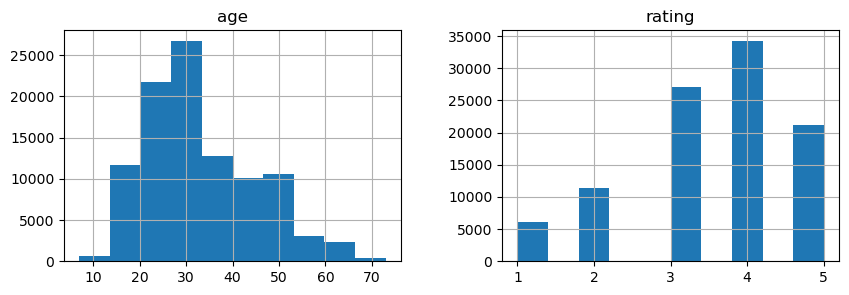

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

df_merge['age']=df_merge['age'].astype(int)
df_merge['rating']=df_merge['rating'].astype(int)

df_merge.hist(figsize=(10,3))
plt.show()

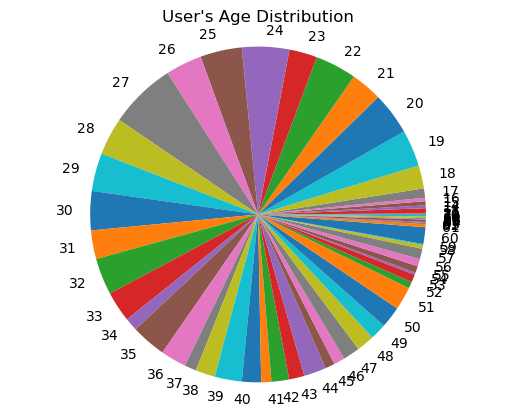

In [6]:
# age distrubution
age_count = df_merge[['user id', 'age']].groupby('age', as_index=False).size()  # count the numbers
plt.pie(age_count["size"], labels=age_count['age'])
plt.title("User's Age Distribution")
plt.axis("equal")
plt.show()

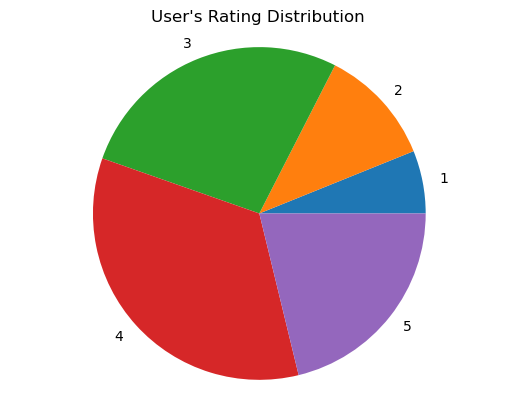

In [7]:
# age distrubution
rating__count = df_merge[['user id', 'rating']].groupby('rating', as_index=False).size()  # count the numbers
plt.pie(rating__count["size"], labels=rating__count['rating'])
plt.title("User's Rating Distribution")
plt.axis("equal")
plt.show()

- 整理可以用來推薦的數據，把資料弄成 Dataframe

## 每個user對於每個item的評價

> 這裡會顯示 User (1~943) 對於每種電影 (Action/Adventure...) 的平均評分

In [8]:
movie_type = ['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
user_to_item = []
for k in range(1, 944):     # 每個user
    num = []
    score = []
    for j in range(7, 25):
        num.append(0)
        score.append(0)
    fliter = (df_merge["user id"] == str(k))
    df_table = df_merge[fliter]
    df_table = np.array(df_table)
    for i in range(len(df_table)):    # 每個user的評價
        for j in range(7, 25):
            if(df_table[i][j] == "1"):
                num[j-7] += 1
                score[j-7] += float(df_table[i][5])
        for j in range(len(score)):
            if (score[j] != 0):
                score[j] = score[j] / num[j]
    user_to_item.append(score)
user_to_item = pd.DataFrame(user_to_item, columns=movie_type)
user_to_item

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.160494e-08,1.382667e-05,1.366379e-43,0.000067,7.740522e-14,4.800000e-03,0.800015,8.165913e-07,1.158053e-23,5.000000e+00,6.011272e-18,1.638246e-47,5.704259e-19,2.917640e-54,3.015099e-26,3.364443e-29,3.458765e-42,2.175836e-59
1,1.061729e-04,2.428468e-14,4.000000e+00,0.003912,1.117918e-08,3.549126e-09,0.000000,8.833728e-02,3.000000e+00,1.373291e-04,2.131628e-14,3.000000e+00,2.861023e-06,5.087561e-06,4.336819e-18,2.009388e-05,2.474002e-14,0.000000e+00
2,8.791209e-02,1.579773e-11,0.000000e+00,0.000000,2.021079e-04,4.118056e-07,5.000000,1.605624e-09,0.000000e+00,2.384186e-06,2.375000e-01,1.250000e-01,2.732054e-04,1.153434e-15,1.250000e-01,6.802724e-03,4.096000e-08,0.000000e+00
3,6.610483e-01,1.250090e-01,0.000000e+00,0.000000,1.250286e+00,2.170330e-02,5.000000,3.876544e-03,0.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00,1.343707e-03,3.048316e-04,5.644452e-02,2.117550e-02,2.197266e-03,0.000000e+00
4,3.631532e-09,6.464049e-14,2.710414e-09,0.000041,1.814224e-06,3.044473e-37,0.000000,1.571663e-46,1.136868e-12,5.000000e+00,1.441819e-01,6.521013e-23,5.162350e-09,1.920725e-23,6.464053e-14,1.903666e-42,3.061060e-47,2.441406e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.111111e-01,2.000000e-01,4.000000e+00,4.000000,1.917583e-02,2.314815e-03,0.000000,8.820358e-08,4.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e-04,1.136869e-13,5.995283e-12,3.142253e-06,0.000000e+00
939,8.218953e-05,5.787037e-04,7.031250e-02,0.000051,9.523810e-02,6.938692e-07,0.000000,4.344211e-04,0.000000e+00,3.097410e-08,7.888656e-31,6.614969e-05,1.045376e-06,6.028165e-06,1.457938e-04,1.250000e-04,3.990930e-05,0.000000e+00
940,2.000619e-01,3.809524e-01,4.487847e-01,2.250000,8.396870e-02,3.000000e+00,0.000000,4.004427e-02,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,2.500001e-01,2.861732e-01,5.000000e+00,0.000000e+00
941,2.857798e-05,2.332537e-08,1.490116e-08,0.000012,1.818339e-01,0.000000e+00,0.000000,1.335187e-01,2.328306e-10,5.000000e+00,3.046398e-21,4.800000e-03,7.526935e-06,1.017724e-03,6.282464e-25,3.912742e-09,4.000000e-01,1.598919e-10


- 查看數據 type 是否可以拿來做圖表分析

In [9]:
user_to_item.dtypes

Action         float64
Adventure      float64
Animation      float64
Children's     float64
Comedy         float64
Crime          float64
Documentary    float64
Drama          float64
Fantasy        float64
Film-Noir      float64
Horror         float64
Musical        float64
Mystery        float64
Romance        float64
Sci-Fi         float64
Thriller       float64
War            float64
Western        float64
dtype: object

- 顯示每個 User 對於該部電影的評分

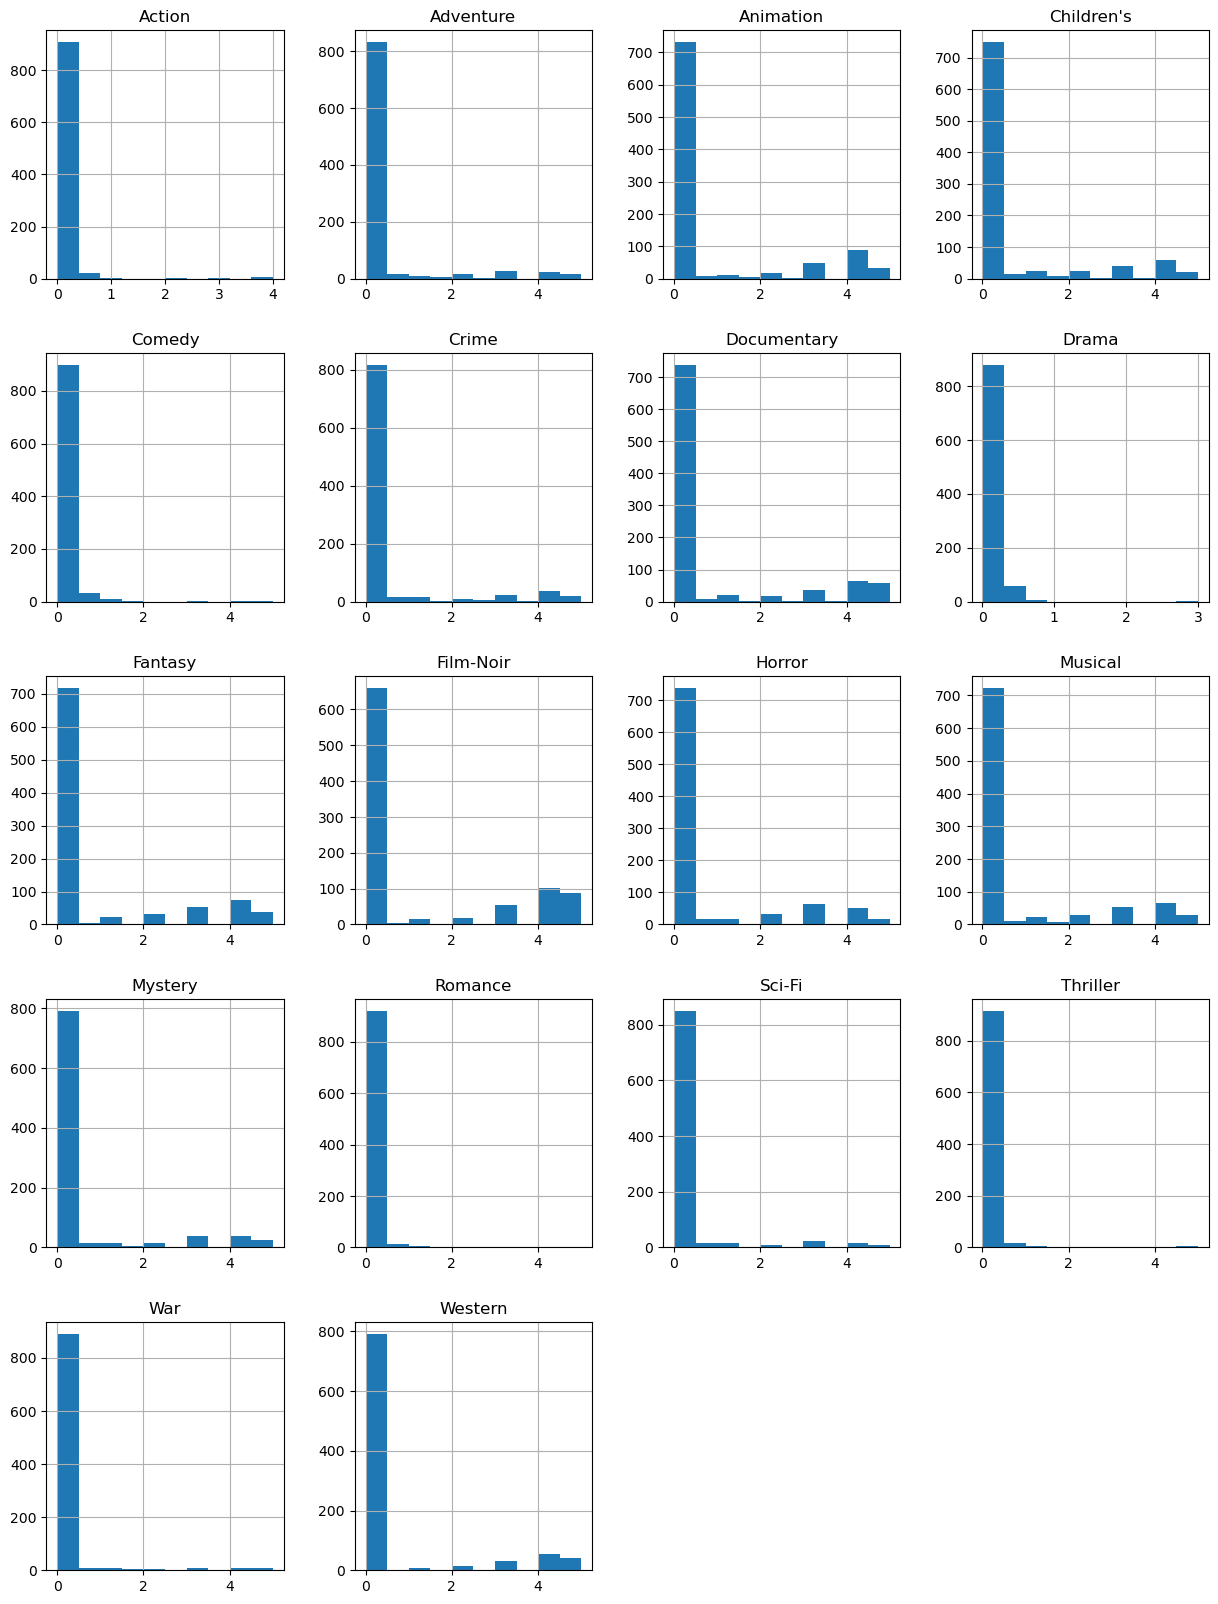

In [10]:
user_to_item.hist(figsize=(15,20))

plt.show()

## 每個item對於每個user的性別

> 這裡會顯示每部電影觀看的人數裡男性比例為何

In [12]:
item_to_gender = []
for k in range(1, 1683):     # 每個item
    Man = 0
    Feman = 0
    fliter = (df_merge["item id"] == str(k))
    df_table = df_merge[fliter]
    df_table = np.array(df_table)
    for i in range(len(df_table)):
        if(df_table[i][2] == "1"):
            Man += 1
        else:
            Feman += 1
    gender = 100 * Man / (Man + Feman)
    item_to_gender.append(gender)
item_to_gender = pd.DataFrame(item_to_gender, columns=['Man'])
item_to_gender

,Man
0,73.672566
1,85.496183
2,82.222222
3,78.468900
4,74.418605
...,...
1677,100.000000
1678,100.000000
1679,100.000000
1680,100.000000


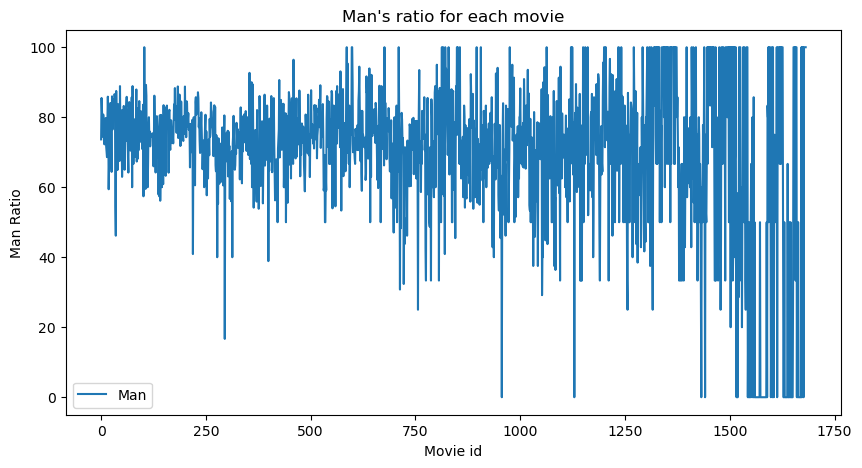

In [114]:
# bins 等於別個數
# 如果該電影有 10 人以上觀看則顯示
item_to_gender.plot(figsize=(10,5))
plt.title("Man's ratio for each movie", fontsize = 12)
plt.xlabel("Movie id")
plt.ylabel("Man Ratio")
plt.show()

## 每個item對於每個user的年齡

> 顯示每個電影觀看人數裡，各個年齡層區段有多少人

In [15]:
item_to_age = []
for k in range(1, 1683):     # 每個item
    table = []  # 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-
    for i in range(7):
        table.append(0)
    fliter = (df_merge["item id"] == str(k))
    df_table = df_merge[fliter]
    df_table = np.array(df_table)
    for i in range(len(df_table)):
        age = int(df_table[i][1])
        if(age < 10):
            table[0] += 1
        elif(10 <= age and age < 20):
            table[1] += 1
        elif(20 <= age and age < 30):
            table[2] += 1
        elif(30 <= age and age < 40):
            table[3] += 1
        elif(40 <= age and age < 50):
            table[4] += 1
        elif(50 <= age and age < 60):
            table[5] += 1
        else:
            table[6] += 1
    item_to_age.append(table)
item_to_age = pd.DataFrame(item_to_age, columns=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-'])
item_to_age

,0-9,10-19,20-29,30-39,40-49,50-59,60-
0,0,37,189,121,70,29,6
1,1,11,66,33,15,3,2
2,0,15,53,13,4,5,0
3,0,15,88,61,23,15,7
4,0,10,37,27,7,3,2
...,...,...,...,...,...,...,...
1677,0,1,0,0,0,0,0
1678,0,1,0,0,0,0,0
1679,0,1,0,0,0,0,0
1680,0,0,1,0,0,0,0


- 這裡可以得知 20-29 的人最愛看電影

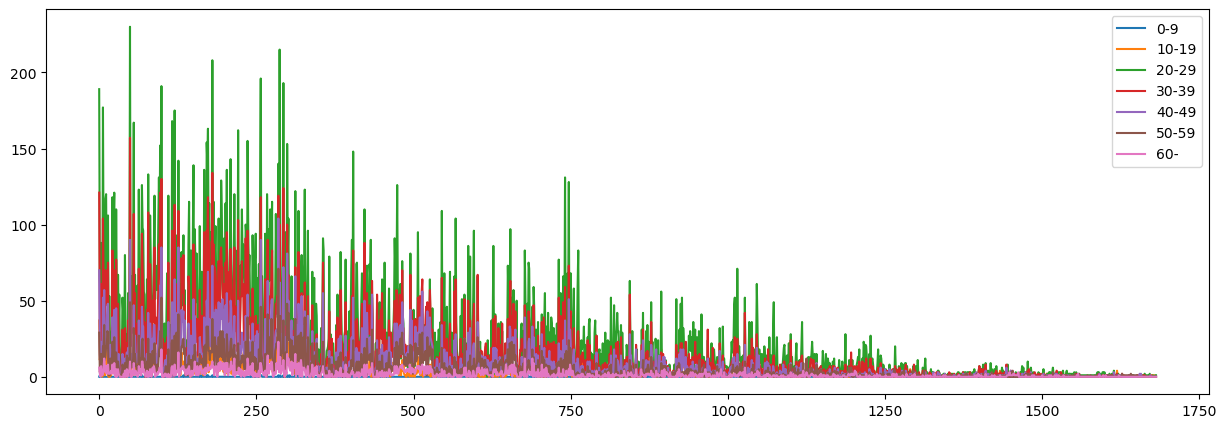

In [16]:
item_to_age.plot(figsize=(15,5))
plt.show()

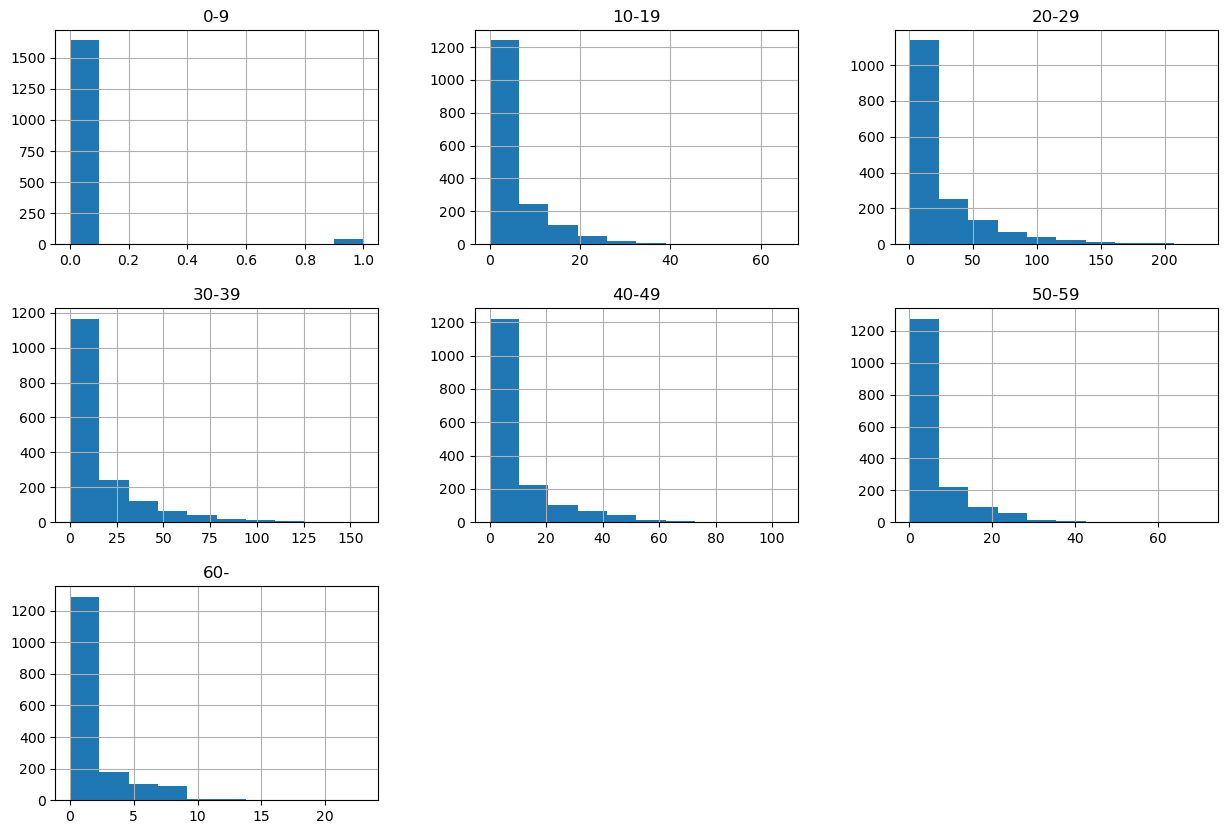

In [17]:
item_to_age.hist(figsize=(15,10))
plt.show()

## 每個item對於每個user的職業

> 顯示每個電影觀看人數裡，各個職業區段有多少人

In [18]:
occupation = ['technician', 'other', 'writer', 'executive', 'administrator', 'student', 'lawyer', 'educator', 'scientist', 'entertainment', 'programmer', 'librarian', 'homemaker', 'artist', 'engineer', 'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor']
item_to_occupation = []
for k in range(1, 1683):     # 每個item
    table = []  # 所有occupation
    for i in range(21):
        table.append(0)
    fliter = (df_merge["item id"] == str(k))
    df_table = df_merge[fliter]
    df_table = np.array(df_table)
    for i in range(len(df_table)):
        occ = df_table[i][3]
        for j in range(len(occupation)):
            if(occ == occupation[j]):
                table[j] += 1
    item_to_occupation.append(table)
item_to_occupation = pd.DataFrame(item_to_occupation, columns=occupation)
item_to_occupation

,technician,other,writer,executive,administrator,student,lawyer,educator,scientist,entertainment,...,librarian,homemaker,artist,engineer,marketing,none,healthcare,retired,salesman,doctor
0,17,51,16,17,31,105,6,41,11,11,...,17,2,12,46,10,6,7,3,4,4
1,7,15,7,4,5,39,1,6,2,2,...,1,0,1,16,2,2,3,1,0,0
2,4,9,2,1,4,33,0,5,0,2,...,3,0,0,11,3,2,2,0,1,0
3,8,18,10,6,16,46,3,19,6,3,...,12,0,3,23,2,2,2,5,4,1
4,3,11,7,2,6,19,1,4,2,5,...,6,0,0,5,1,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1680,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 這裡可以得知學生最愛看電影

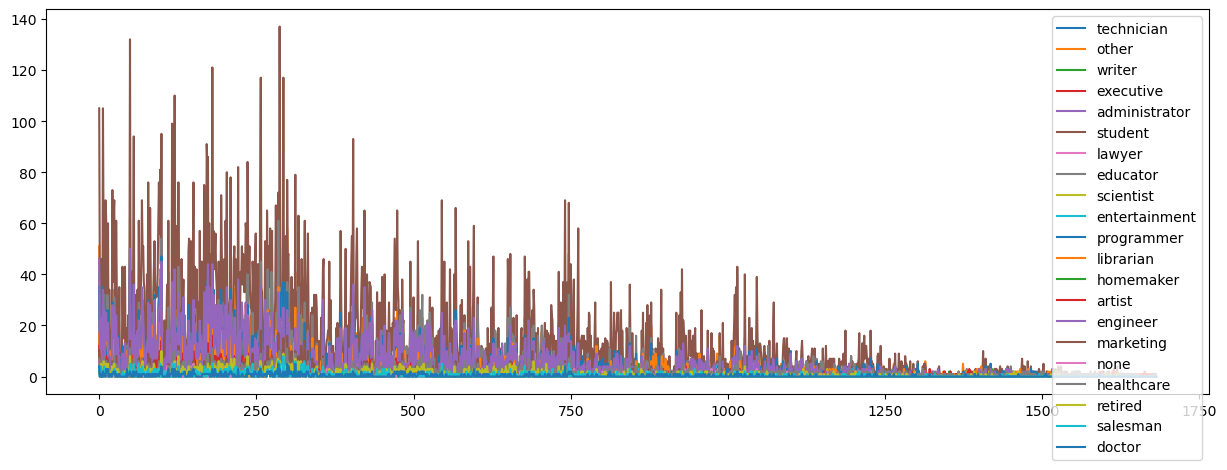

In [19]:
item_to_occupation.plot(figsize=(15,5))
plt.show()

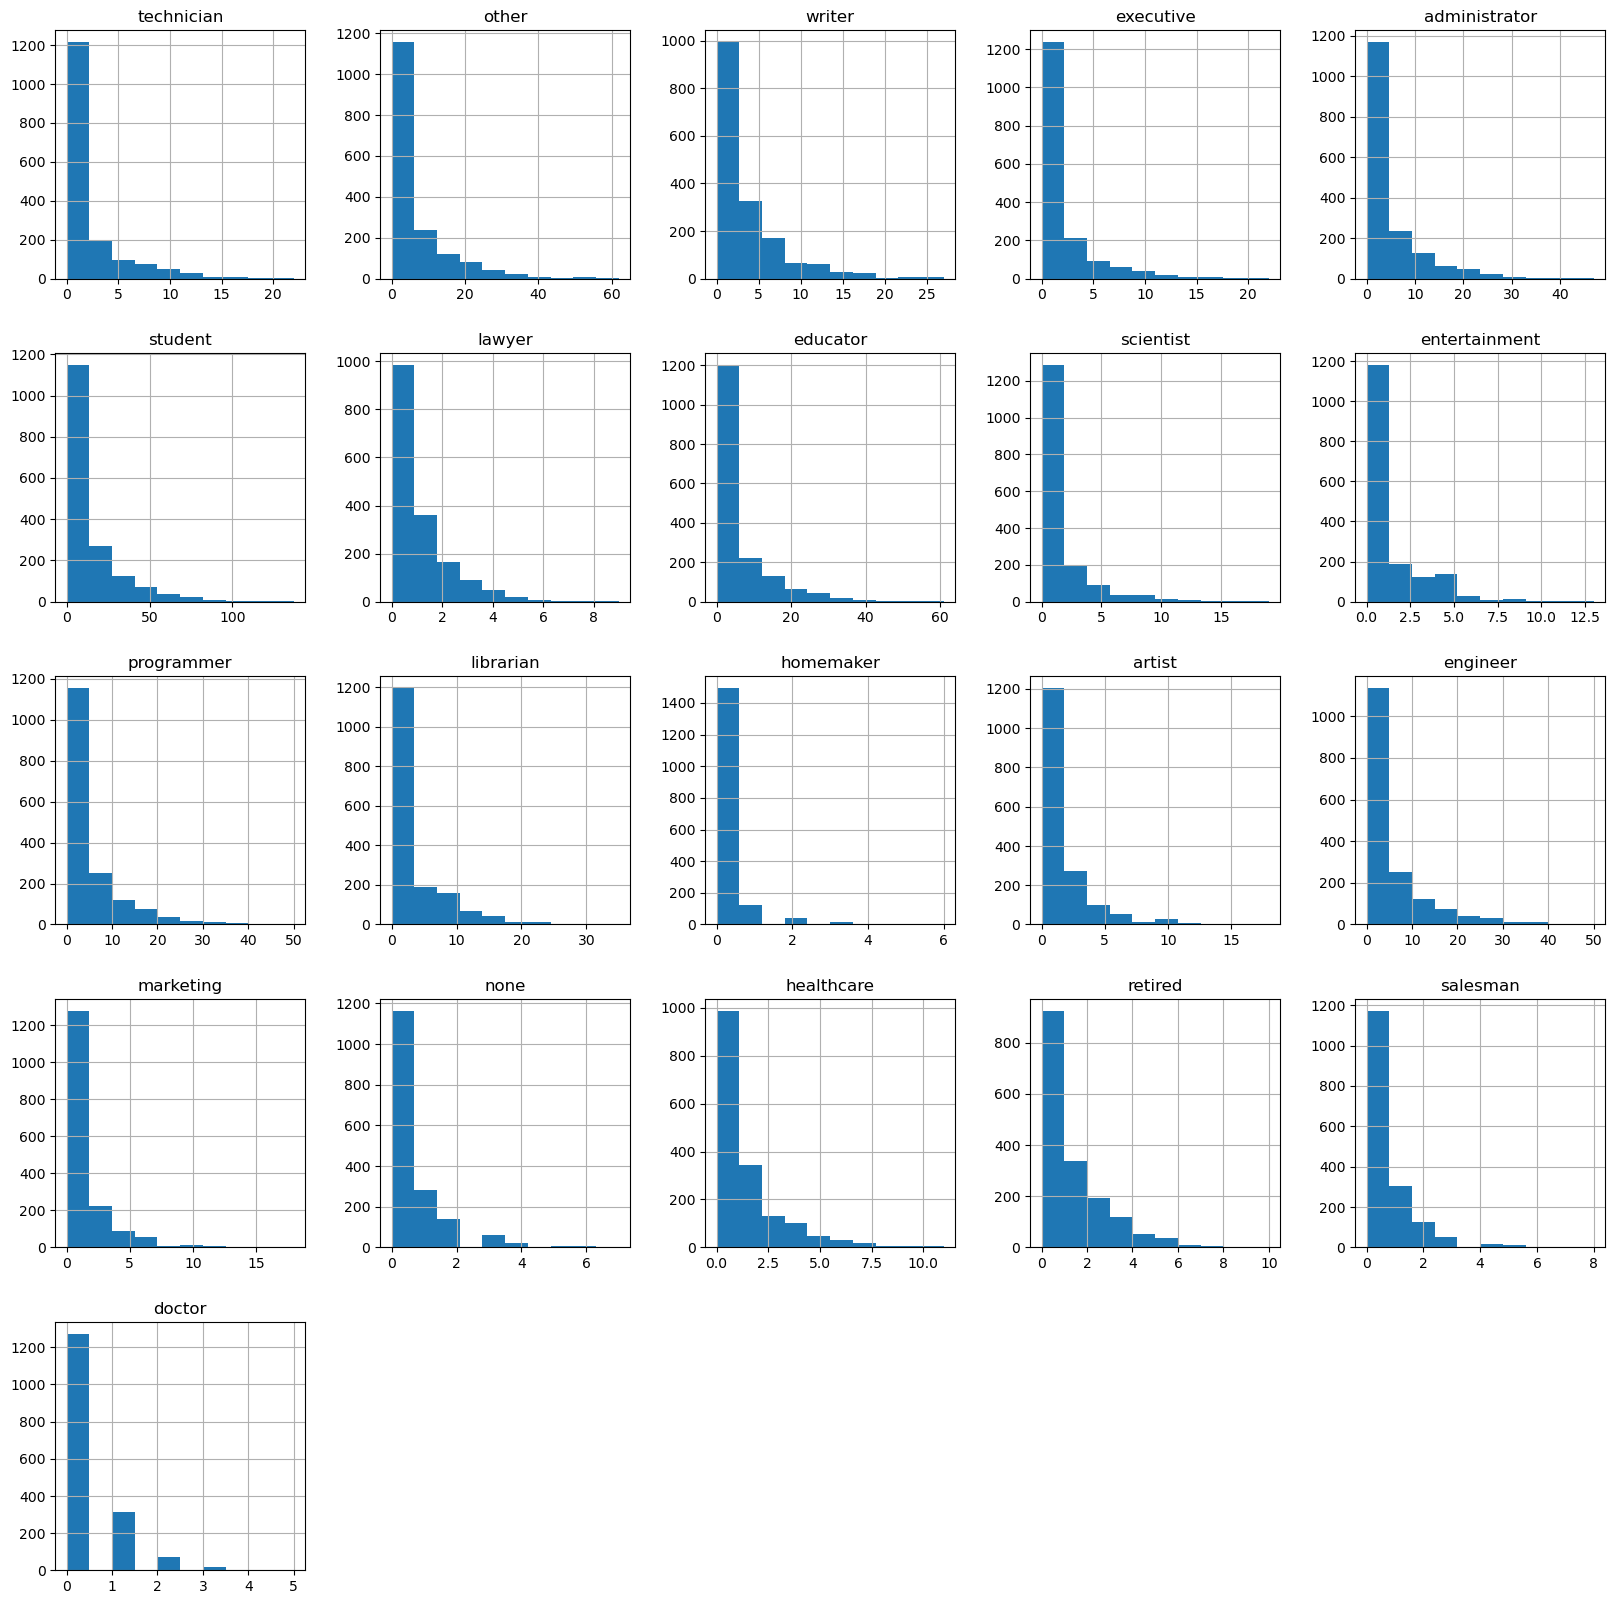

In [20]:
item_to_occupation.hist(figsize=(20,20))
plt.show()

# ---------------------------------------------------------------------------------------
# 推薦方法
# 方案1：Item-based Collaborative Filtering

> 先跑看看 data 的成效，把資料、函式都寫好

## item-based CF - 訓練 ua.base

In [24]:
import numpy as np
import pandas as pd
u1_base = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/ua.base',encoding="UTF-8").read()
#u1_base = open('C:/Users/User/NDHU/Recommend/ml-100k/u1.base',encoding="UTF-8").read()
u1_base = u1_base.replace('\n','|')
u1_base = u1_base.replace('\t','|')
u1_base = u1_base.split('|')
del u1_base[-1]
u1_base = np.array(u1_base).reshape(int(len(u1_base)/4),4)
u1_base = pd.DataFrame(u1_base, columns=['user id','item id','rating','timestamp'])
del u1_base['timestamp']
u1_base

,user id,item id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
90565,943,1047,2
90566,943,1074,4
90567,943,1188,3
90568,943,1228,3


In [25]:
import pandas as pd 
#df_data_ = pd.DataFrame(data, columns=['user_id','item_id','rating','timestamp'])

n_users = u1_base['user id'].unique().shape[0]
n_items = u1_base['item id'].unique().shape[0]
A = np.zeros((n_users,n_items))
for line in u1_base.itertuples():
    A[int(line[1])-1,int(line[2])-3] = line[3]

A = pd.DataFrame(A)
A

,0,1,2,3,4,5,6,7,8,9,...,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679
0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 計算每個使用者全部電影評分總分為多少、平均評分為多少

In [26]:
A['total_rating']=0
A['Mean_rating'] = 0
A['total_rating']=A['total_rating'].astype(float)
A['Mean_rating']=A['Mean_rating'].astype(float)
# num = 為每個使用者計算有評分的電影有多少
num = 0
for i in range(len(A)):
    for j in range(0, 1680):
        #print("i:",i,"| j:",j,"| ",A[j][i])
        if A[j][i] != 0:
            num += 1
            A['total_rating'][i] += A[j][i]
            #print("total_rating: ", A['total_rating'][i])
    A['Mean_rating'][i] = (A['total_rating'][i] / num)
    num = 0
A

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,total_rating,Mean_rating
0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,944.0,3.603053
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,195.0,3.750000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,2.909091
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,4.357143
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480.0,2.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0,4.307692
939,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,336.0,3.463918
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,46.0,3.833333
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,4.304348


- 減掉平均評分

In [27]:
for i in range(len(A)):
    for j in range(0, 1680):
        #print("i:",i,"| j:",j,"| ",A[j][i], "| Mean_rating: ", A['Mean_rating'][i])
        if A[j][i] != 0:
            A[j][i] = (A[j][i] - A['Mean_rating'][i])
A

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,total_rating,Mean_rating
0,0.396947,-0.603053,-0.603053,1.396947,0.396947,-2.603053,1.396947,-0.603053,-1.603053,1.396947,...,0.0,0.0,0.0,0.0,0.0,0.0,1.396947,-0.603053,944.0,3.603053
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.750000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,195.0,3.750000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,128.0,2.909091
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.357143,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,61.0,4.357143
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,480.0,2.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.692308,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,168.0,4.307692
939,0.000000,-1.463918,0.000000,0.000000,0.536082,1.536082,-0.463918,0.000000,0.000000,0.536082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,336.0,3.463918
940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.166667,0.000000,46.0,3.833333
941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,297.0,4.304348


In [116]:
import cmath

def AdjustedCosine(i, j):   # 兩行item的比較，由上而下
    num1 = 0
    num2 = 0
    num3 = 0
    for m in range(943):
        if(A[i][m]>0 and A[j][m]>0):
            num1 += A[i][m] * A[j][m]
            num2 += A[i][m] * A[i][m]
            num3 += A[j][m] * A[j][m]
    num2 = cmath.sqrt(num2)
    num3 = cmath.sqrt(num3)
    if num1 == 0:
        return 0
    return num1 / (num2 * num3)

def To_AdjustedCosine(n_user, n_item):
    temp = []
    for i in range(n_item):
        temp.append(0)
    for i in range(n_item):         # 由左而右
        if(A[i][n_user] > 0):
            temp[i] += AdjustedCosine(i, n_item)
    big1 = 0
    big2 = 0
    for i in range(n_item):
        if(temp[i]>temp[big1]):
            big1 = i
    for i in range(n_item):
        if(temp[i]>temp[big2] and i!=big1):
            big2 = i
    num1 = A[big1][n_user]*temp[big1] + A[big1][n_user]*temp[big1]
    num2 = temp[big1] + temp[big2]
    return num1/num2

- 只採取 ua.base user1 的前 500 部電影評分為訓練樣本

In [29]:
for i in range(1):
    for j in range(0, 500):
        A[j][i] = A[j][i] + A['Mean_rating'][i]
        if A[j][i] == 0:
            print("i:",i,"| j:",j)
            A[j][i] = To_AdjustedCosine(i,j)
A

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,total_rating,Mean_rating
0,4.0,3.000000,3.0,5.0,4.000000,1.000000,5.000000,3.00,2.000000,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.396947,-0.603053,944.0,3.603053
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1.75,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,195.0,3.750000
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,128.0,2.909091
3,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,-0.357143,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,61.0,4.357143
4,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,480.0,2.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.692308,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,168.0,4.307692
939,0.0,-1.463918,0.0,0.0,0.536082,1.536082,-0.463918,0.00,0.000000,0.536082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,336.0,3.463918
940,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.166667,0.000000,46.0,3.833333
941,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,297.0,4.304348


## item-based CF - 測試 ua.test

- 開始整理 ua.test 資料

In [77]:
import numpy as np
import pandas as pd
#u1_test = open('C:/Users/User/NDHU/Recommend/ml-100k/u1.test',encoding="UTF-8").read()
u1_test = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/ua.test',encoding="UTF-8").read()
u1_test = u1_test.replace('\n','|')
u1_test = u1_test.replace('\t','|')
u1_test = u1_test.split('|')
del u1_test[-1]
u1_test = np.array(u1_test).reshape(int(len(u1_test)/4),4)
u1_test = pd.DataFrame(u1_test, columns=['user id','item id','rating','timestamp'])
del u1_test['timestamp']
u1_test

,user id,item id,rating
0,1,20,4
1,1,33,4
2,1,61,4
3,1,117,3
4,1,155,2
...,...,...,...
9425,943,232,4
9426,943,356,4
9427,943,570,1
9428,943,808,4


In [78]:
u1_test.dtypes

user id    object
item id    object
rating     object
dtype: object

In [79]:
import pandas as pd
n_users = u1_test['user id'].unique().shape[0]
n_items = u1_test['item id'].unique().shape[0]
test = u1_test.pivot(index = 'user id', columns = 'item id', values = 'rating')

test = test.fillna(0)
test

item id,1,10,100,1003,1004,1005,1006,1007,1008,1009,...,989,99,990,991,993,994,995,996,997,998
user id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
test.dtypes

item id
1       object
10      object
100     object
1003    object
1004    object
         ...  
994     object
995     object
996     object
997     object
998     object
Length: 1129, dtype: object

In [81]:
test=test.astype(float)
test=test.to_numpy()
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## item-based CF - 計算誤差

- 把 A 表和 test user1 前 500 筆資料做相減，求誤差，誤差等於加總誤差除以資料量

In [118]:
ua_test = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/ua.test',encoding="UTF-8").read()
ua_test = ua_test.replace('\n','|')
ua_test = ua_test.replace('\t','|')
ua_test = ua_test.split('|')
del ua_test[-1]
ua_test = np.array(ua_test).reshape(int(len(ua_test)/4),4)
ua_test = pd.DataFrame(ua_test, columns=['user_id','item_id','rating','timestamp'])

y_pred = np.zeros(len(ua_test), dtype = 'float')
for i in range(80):
    y_pred[i] = y_pred[i] + To_AdjustedCosine(int(ua_test['user_id'][i]), int(ua_test['item_id'][i]))

y_test = ua_test['rating']

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\737486765.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  y_pred[i] = y_pred[i] + To_AdjustedCosine(int(ua_test['user_id'][i]), int(ua_test['item_id'][i]))
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\455107897.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return num1/num2


In [127]:
score = 0
num = 0
for i in range(80):
    aa = abs(float(y_test[i]) - y_pred[i])
    if (aa >0):
        score += aa
        num += 1
score = 100 * score / num
print('誤差程度:', score, '%')

誤差程度: 277.1153844346946 %


### item-based CF 誤差 : 約 277 %

# ---------------------------------------------------------------------------------

# 方案2：Pearson 相關係數

In [102]:
import numpy as np
import pandas as pd
#u1_base = open('C:/Users/User/NDHU/Recommend/ml-100k/ua.base',encoding="UTF-8").read()
u1_base = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/ua.base',encoding="UTF-8").read()
u1_base = u1_base.replace('\n','|')
u1_base = u1_base.replace('\t','|')
u1_base = u1_base.split('|')
del u1_base[-1]
u1_base = np.array(u1_base).reshape(int(len(u1_base)/4),4)
u1_base = pd.DataFrame(u1_base, columns=['user id','item id','rating','timestamp'])
u1_base = pd.merge(u1_base, df_item)
u1_base = pd.merge(df_user, u1_base)
del u1_base['timestamp']
del u1_base['zip code']
del u1_base['occupation']
del u1_base['video release date']

y_u1_base = np.array(u1_base['rating'])
y_u1_base = y_u1_base.astype(float)
x_u1_base = u1_base.copy()
del x_u1_base['rating']
u1_base

,user id,age,gender,item id,rating,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,1,1,5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1,2,3,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,24,1,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,24,1,4,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,24,1,5,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90565,943,22,1,1047,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
90566,943,22,1,1074,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
90567,943,22,1,1188,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
90568,943,22,1,1228,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
import numpy as np
import pandas as pd
#u1_test = open('C:/Users/User/NDHU/Recommend/ml-100k/ua.test',encoding="UTF-8").read()
u1_test = open('C:/Users/Yun/My_Jupyter/Recommand_System/datasets/ml-100k/ua.test',encoding="UTF-8").read()
u1_test = u1_test.replace('\n','|')
u1_test = u1_test.replace('\t','|')
u1_test = u1_test.split('|')
del u1_test[-1]
u1_test = np.array(u1_test).reshape(int(len(u1_test)/4),4)
u1_test = pd.DataFrame(u1_test, columns=['user id','item id','rating','timestamp'])
u1_test = pd.merge(u1_test, df_item)
u1_test = pd.merge(df_user, u1_test)
del u1_test['timestamp']
del u1_test['zip code']
del u1_test['occupation']
del u1_test['video release date']

y_u1_test = np.array(u1_test['rating'])
y_u1_test = y_u1_test.astype(float)
x_u1_test = u1_test.copy()
del x_u1_test['rating']
u1_test

,user id,age,gender,item id,rating,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,1,20,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,24,1,33,4,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,24,1,61,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,24,1,117,3,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,24,1,155,2,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,943,22,1,1067,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9426,943,22,1,58,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9427,943,22,1,232,4,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9428,943,22,1,570,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 每個user對於每個類型的評分

In [104]:
col_1 = ['user id'] + movie_type

user_to_item_1 = []
for k in range(len(df_user)):     # 每個user
    num = []
    score = []
    score.append(k+1)
    for j in range(4, 22):
        num.append(0)
        score.append(0)
    fliter = (x_u1_base["user id"] == str(k))
    df_table = x_u1_base[fliter]
    df_table = np.array(df_table)
    for i in range(len(df_table)):    # 每個user的評價
        for j in range(4, 22):
            if(df_table[i][j] == "1"):
                num[j-4] += 1
                score[j-3] += float(y_u1_base[i])
        for j in range(len(score)-1):
            if (score[j+1] != 0):
                score[j+1] = score[j+1] / num[j]
    user_to_item_1.append(score)
user_to_item_1 = pd.DataFrame(user_to_item_1, columns=col_1)
user_to_item_1

,user id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2,3.858025e-04,1.189768e-03,1.420873e-33,4.201586e-16,8.337567e-08,6.871948e-26,1.811936e-103,2.885069e-02,8.228460e-38,5.000000e+00,1.871598e-42,1.022234e-62,4.096000e-09,4.882813e-08,1.202920e-03,4.249930e-05,3.200000e-03,2.244250e-31
2,3,1.166181e-02,4.882812e-03,5.000000e+00,2.572016e-03,2.500000e-01,1.175555e-05,0.000000e+00,1.001539e-01,5.000000e+00,1.098633e-03,2.734375e-02,3.000000e+00,6.572931e-04,1.569859e-03,2.323058e-08,2.512402e-02,1.043081e-07,0.000000e+00
3,4,6.865217e-03,1.333333e+00,0.000000e+00,0.000000e+00,6.250004e-02,2.408514e-07,3.000000e+00,2.457449e-10,0.000000e+00,4.074536e-10,8.680556e-02,5.625000e-01,3.763355e-06,3.125000e-01,5.912698e-01,2.666669e-01,5.687604e-14,0.000000e+00
4,5,8.370082e-01,2.527006e-02,0.000000e+00,0.000000e+00,5.000000e+00,1.097394e-02,5.000000e+00,1.028807e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.748971e-02,3.000000e+00,2.536651e-02,2.611883e-02,3.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,7.624402e-11,1.498437e-08,1.192093e-06,1.752650e-10,6.336351e-02,3.039012e-17,0.000000e+00,6.666667e-02,5.115908e-13,4.000000e+00,7.450584e-08,1.192093e-06,1.560146e-31,3.826876e-05,1.056057e-30,1.455898e-10,9.765625e-04,5.000000e+00
939,940,1.250002e-01,3.763353e-06,0.000000e+00,0.000000e+00,3.486128e-02,6.666667e-01,0.000000e+00,2.633745e-06,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,5.000000e+00,5.486969e-03,1.097790e-14,2.090853e-07,1.525879e-05,0.000000e+00
940,941,1.382404e-05,1.455713e-37,4.656613e-10,5.153961e-24,1.972388e-03,1.842284e-15,0.000000e+00,1.220122e-01,0.000000e+00,3.484586e-07,1.220703e-04,2.481293e-13,2.057613e-02,5.017316e-04,2.237457e-09,3.138041e-05,7.809246e-05,0.000000e+00
941,942,4.032279e-03,2.708333e-01,1.875000e-01,5.000000e+00,1.039583e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.292438e-01,8.666667e-04,0.000000e+00,0.000000e+00


## 找出目標user相似度較高的其他user做推薦

In [105]:
from scipy.stats import pearsonr
import numpy as np

def pearsonrSim(x,y):  # 皮尔森相似度
    return pearsonr(x,y)[0]

def No_zero(A):
    for j in A:
        if j > 0:
            return 1
    return 0

def SimTable(goal):
    sim_table = []
    for k in range(len(df_user)):
        a = []
        b = []
        sim_user = []
        for i in movie_type:
            a.append(user_to_item_1[i][goal])
            b.append(user_to_item_1[i][k])
        if(No_zero(b) and No_zero(a)):
            sim = pearsonrSim(a,b)
            sim_user.append(user_to_item_1['user id'][k])
            sim_user.append(sim)
            if(sim >= 0.95):
                sim_table.append(sim_user)
    sim_table = pd.DataFrame(sim_table, columns=['user id', 'sim'])
    sim_table = sim_table.sort_values(by=['sim'], ascending=False)
    return sim_table

user_to_user = SimTable(5)
user_to_user

,user id,sim
1,6,1.000000
28,796,0.999124
33,902,0.998870
10,254,0.998786
11,264,0.998780
9,237,0.998633
22,607,0.998586
0,2,0.998423
25,758,0.998310
5,114,0.998269


## 把與目標user相似度最高的其他user做訓練

In [106]:
table_sim = SimTable(int(u1_base["user id"][10]))
fliter = (u1_base["user id"] == str(table_sim["user id"][0]))
table_all_sim = u1_base[fliter]
for i in range(1, len(table_sim)):
    fliter = (u1_base["user id"] == str(table_sim["user id"][i]))
    table_all_sim = table_all_sim.append(u1_base[fliter])
table_all_sim

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\1205737876.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\1205737876.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\1205737876.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\1205737876.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u

,user id,age,gender,item id,rating,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
262,2,53,2,1,4,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
263,2,53,2,10,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
264,2,53,2,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
265,2,53,2,19,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,2,53,2,25,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87251,902,45,2,497,5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87252,902,45,2,754,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
87253,902,45,2,879,4,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
87254,902,45,2,989,2,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


- 利用 MSE 去計算 Pearson 誤差

In [107]:
# MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

def acc(a, b):
    score = 0
    num = len(a)
    for i in range(num):
        score += abs(a[i] - b[i])
        score = 100 * score / num
    return score

accuracy = []
#for k in range(len(u1_test)):
for k in range(0, 5):
    table_sim = SimTable(int(u1_test["user id"][k]))
    fliter = (u1_base["user id"] == str(table_sim["user id"][0]))
    table_all_sim = u1_base[fliter]
    for i in range(1, len(table_sim)):
        fliter = (u1_base["user id"] == str(table_sim["user id"][i]))
        table_all_sim = table_all_sim.append(u1_base[fliter])
    y_base = np.array(table_all_sim['rating'])
    y_base = y_base.astype(float)
    x_base = table_all_sim
    del x_base['rating']

    fliter = (u1_base["user id"] == str(u1_base["user id"][k]))
    x_test = u1_test[fliter]
    y_test = np.array(x_test['rating'])
    y_test = y_test.astype(float)
    del x_test['rating']
    
    lm = LinearRegression()
    lm.fit(x_base, y_base)
    pred_train = lm.predict(x_base)
    pred_test = lm.predict(x_test)
    MSE_train = np.mean((y_base-pred_train)**2)
    MSE_test = np.mean((y_test-pred_test)**2)
    accuracy.append(acc(y_test, pred_test))
print(accuracy)

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

[0.2683379486678753, 0.2683379486678753, 0.2683379486678753, 0.2683379486678753, 0.2683379486678753]


C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\4026134288.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

In [108]:
temp = 0.000
error = 0.0
for i in range(len(accuracy)):
    temp = accuracy[i]
    if(temp > error):
        error = temp
print("準確度 : ", error*100)

準確度 :  26.83379486678753


### Pearson 相關係數準確度 : 約 27 %

# ---------------------------------------------------------------------------------
# 方案3：DecisionTree

In [109]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
accuracy = []
#for k in range(len(u1_test)):
for k in range(0, 5):
    table_sim = SimTable(int(u1_test["user id"][k]))
    fliter = (u1_base["user id"] == str(table_sim["user id"][0]))
    table_all_sim = u1_base[fliter]
    for i in range(1, len(table_sim)):
        fliter = (u1_base["user id"] == str(table_sim["user id"][i]))
        table_all_sim = table_all_sim.append(u1_base[fliter])
    y_base = np.array(table_all_sim['rating'])
    y_base = y_base.astype(float)
    x_base = table_all_sim
    del x_base['rating']

    fliter = (u1_base["user id"] == str(u1_base["user id"][k]))
    x_test = u1_test[fliter]
    y_test = np.array(x_test['rating'])
    y_test = y_test.astype(float)
    del x_test['rating']
    
    model = DecisionTreeClassifier(criterion="entropy")
    model.fit(x_base, y_base)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
print(accuracy)

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u

[0.1946564885496183, 0.22137404580152673, 0.20610687022900764, 0.20229007633587787, 0.17557251908396945]


C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\782657670.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u

In [110]:
temp = 0.000
error = 0.00
for i in range(len(accuracy)):
    temp = accuracy[i]
    if(temp > error):
        error = temp
print("準確度 : ", error*100)

準確度 :  22.137404580152673


### Desicion tree 準確度 : 約 22 %

# ---------------------------------------------------------------------------------
# 方案4：KNN

In [111]:
# KNeighbors
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn import metrics
accuracy = []
#for k in range(len(u1_test)):
for k in range(0, 5):
    table_sim = SimTable(int(u1_test["user id"][k]))
    fliter = (u1_base["user id"] == str(table_sim["user id"][0]))
    table_all_sim = u1_base[fliter]
    for i in range(1, len(table_sim)):
        fliter = (u1_base["user id"] == str(table_sim["user id"][i]))
        table_all_sim = table_all_sim.append(u1_base[fliter])
    y_base = np.array(table_all_sim['rating'])
    y_base = y_base.astype(float)
    x_base = table_all_sim
    del x_base['rating']

    fliter = (u1_base["user id"] == str(u1_base["user id"][k]))
    x_test = u1_test[fliter]
    y_test = np.array(x_test['rating'])
    y_test = y_test.astype(float)
    del x_test['rating']
    
    clf = neighbors.KNeighborsClassifier()
    knn_clf = clf.fit(x_base, y_base)
    y_pred = knn_clf.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
print(accuracy)

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

[0.26717557251908397, 0.26717557251908397, 0.26717557251908397, 0.26717557251908397, 0.26717557251908397]


C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.append(u1_base[fliter])
C:\Users\Yun\AppData\Local\Temp\ipykernel_12220\2074615636.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_all_sim = table_all_sim.appe

In [112]:
temp = 0.000
accurace = 0.00
for i in range(len(accuracy)):
    temp = accuracy[i]
    if(temp > accurace):
        accurace = temp
print("accurace : ", accurace*100)

accurace :  26.717557251908396


### KNN 準確度 : 約 27 %

# ---------------------------------------------------------------------------------
# 方案5：Mean-Square Error, MSE

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lm = LinearRegression()
lm.fit(x_u1_base, y_u1_base)

pred_train = lm.predict(x_u1_base)
pred_test = lm.predict(x_u1_test)

MSE_train = np.mean((y_u1_base-pred_train)**2)
MSE_test = np.mean((y_u1_test-pred_test)**2)
print("MSE of Training data:", MSE_train)
print("MSE of Testing data:", MSE_test)

MSE of Training data: 1.182056334428181
MSE of Testing data: 1.200959997490553


In [72]:
score = 0
score = abs(MSE_train - MSE_test) * 100
print('Error:', score, '%')

Error: 1.8903663062372011 %
